### 1- problem :
A Fuzzy Logic System for predicting the weather condition of a location based on historical data and current atmospheric condition

In [1]:
import numpy as np 
import pandas as pd
import skfuzzy as fuzz
import tkinter as tk
from tkinter import ttk
from skfuzzy import control as ctrl
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### 2- Fuzzy Variables

input parameters :

1- temperature  (°C)

2- humidity (%)

3- Atmospheric pressure (hPa)

4- Precipitation  (mm)

5- wind_speed (km/h)

6- cloud_cover  (%)

for both historical data and current atmospheric condition

In [66]:
# input variables for historical data
temperature_hist = ctrl.Antecedent(np.arange(-30, 61, 1), 'temperature_hist')
humidity_hist = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity_hist')
pressure_hist = ctrl.Antecedent(np.arange(950, 1051, 1), 'pressure_hist')
wind_speed_hist = ctrl.Antecedent(np.arange(0, 151, 1), 'wind_speed_hist')
precipitation_hist = ctrl.Antecedent(np.arange(0, 501, 1), 'precipitation_hist')
cloud_cover_hist = ctrl.Antecedent(np.arange(0, 101, 1), 'cloud_cover_hist')

In [67]:
# input variables for current data
temperature_curr = ctrl.Antecedent(np.arange(-30, 61, 1), 'temperature_curr')
humidity_curr = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity_curr')
pressure_curr = ctrl.Antecedent(np.arange(950, 1051, 1), 'pressure_curr')
wind_speed_curr = ctrl.Antecedent(np.arange(0, 151, 1), 'wind_speed_curr')
precipitation_curr = ctrl.Antecedent(np.arange(0, 501, 1), 'precipitation_curr')
cloud_cover_curr = ctrl.Antecedent(np.arange(0, 101, 1), 'cloud_cover_curr')

output parameters :

weather

In [68]:
#output variable for weather prediction
weather = ctrl.Consequent(np.arange(0,11, 1), 'weather')

### 3- Membership Functions

##### temperature :

1- cold

2- medium

3- hot

c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


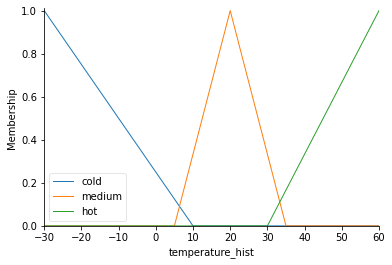

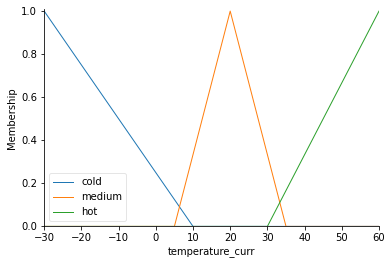

In [76]:
# trimf Membership functions for temperature 

temperature_hist['cold'] = fuzz.trimf(temperature_hist.universe, [-30, -30, 10])
temperature_hist['medium'] = fuzz.trimf(temperature_hist.universe, [5, 20, 35])
temperature_hist['hot'] = fuzz.trimf(temperature_hist.universe, [30, 60, 60])

temperature_curr['cold'] = fuzz.trimf(temperature_curr.universe, [-30, -30, 10])
temperature_curr['medium'] = fuzz.trimf(temperature_curr.universe, [5, 20, 35])
temperature_curr['hot'] = fuzz.trimf(temperature_curr.universe, [30, 60, 60])

temperature_hist.view()
temperature_curr.view()

##### humidity :

1- low

2- medium

3- high

c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


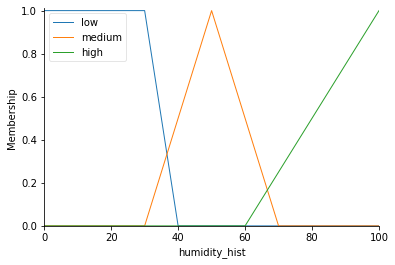

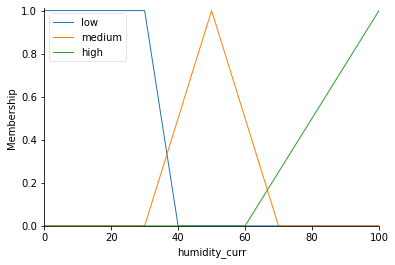

In [77]:
# Membership functions for humidity
humidity_hist['low'] = fuzz.trapmf(humidity_hist.universe, [0, 0, 30, 40])
humidity_hist['medium'] = fuzz.trimf(humidity_hist.universe, [30, 50, 70])
humidity_hist['high'] = fuzz.trimf(humidity_hist.universe, [60, 100, 100])

humidity_curr['low'] = fuzz.trapmf(humidity_curr.universe, [0,0, 30, 40])
humidity_curr['medium'] = fuzz.trimf(humidity_curr.universe, [30, 50, 70])
humidity_curr['high'] = fuzz.trimf(humidity_curr.universe, [60, 100, 100])

humidity_hist.view()
humidity_curr.view()

 ##### pressure :

1- low

2- normal

3- high

c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


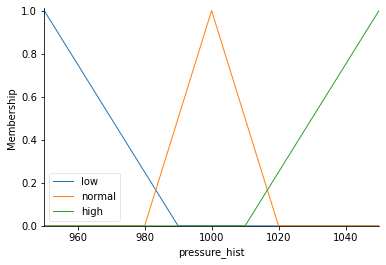

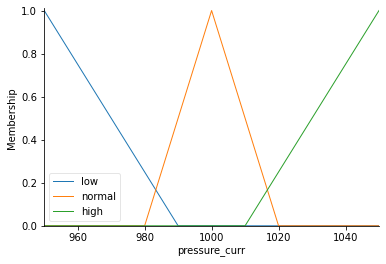

In [78]:
# Membership functions for pressure
pressure_hist['low'] = fuzz.trimf(pressure_hist.universe, [950, 950, 990])
pressure_hist['normal'] = fuzz.trimf(pressure_hist.universe, [980, 1000, 1020])
pressure_hist['high'] = fuzz.trimf(pressure_hist.universe, [1010, 1050, 1050])

pressure_curr['low'] = fuzz.trimf(pressure_curr.universe, [950, 950, 990])
pressure_curr['normal'] = fuzz.trimf(pressure_curr.universe, [980, 1000, 1020])
pressure_curr['high'] = fuzz.trimf(pressure_curr.universe, [1010, 1050, 1050])

pressure_hist.view()
pressure_curr.view()

##### wind speed :

1- calm

2- breezy

3- windy

c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


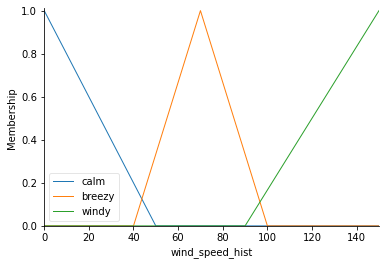

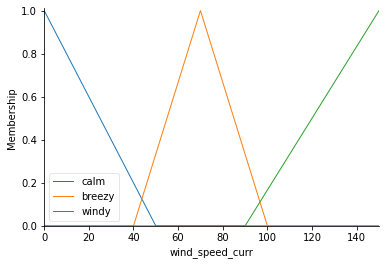

In [79]:
# trimf Membership functions for wind speed
wind_speed_hist['calm'] = fuzz.trimf(wind_speed_hist.universe, [0, 0, 50])
wind_speed_hist['breezy'] = fuzz.trimf(wind_speed_hist.universe, [40, 70, 100])
wind_speed_hist['windy'] = fuzz.trimf(wind_speed_hist.universe, [90, 150, 150])

wind_speed_curr['calm'] = fuzz.trimf(wind_speed_curr.universe, [0, 0, 50])
wind_speed_curr['breezy'] = fuzz.trimf(wind_speed_curr.universe, [40, 70, 100])
wind_speed_curr['windy'] = fuzz.trimf(wind_speed_curr.universe, [90, 150, 150])

wind_speed_hist.view()
wind_speed_curr.view()

 ##### precipitation :

1- none

2- light

3- moderate

4- heavy

c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


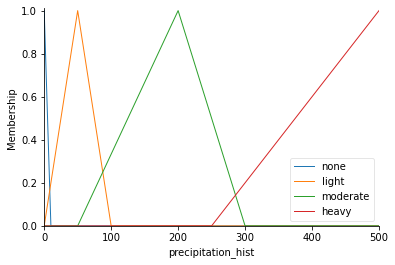

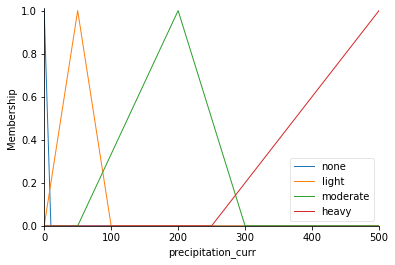

In [80]:
# Membership functions for precipitation
precipitation_hist['none'] = fuzz.trimf(precipitation_hist.universe, [0, 0, 10])
precipitation_hist['light'] = fuzz.trimf(precipitation_hist.universe, [0, 50, 100])
precipitation_hist['moderate'] = fuzz.trimf(precipitation_hist.universe, [50, 200, 300])
precipitation_hist['heavy'] = fuzz.trimf(precipitation_hist.universe, [250, 500, 500])

precipitation_curr['none'] = fuzz.trimf(precipitation_curr.universe, [0, 0, 10])
precipitation_curr['light'] = fuzz.trimf(precipitation_curr.universe, [0, 50, 100])
precipitation_curr['moderate'] = fuzz.trimf(precipitation_curr.universe, [50, 200, 300])
precipitation_curr['heavy'] = fuzz.trimf(precipitation_curr.universe, [250, 500, 500])

precipitation_hist.view()
precipitation_curr.view()

##### cloud cover :

1- clear

2- partly cloudy

3- mostly cloudy

4- overcast

c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


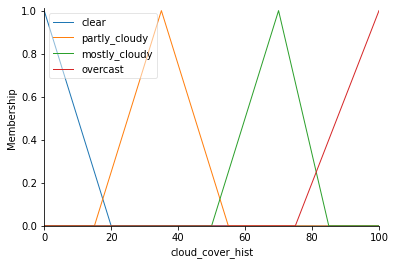

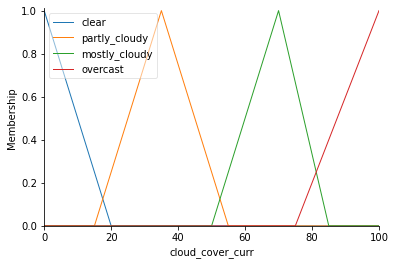

In [81]:
# trimf Membership functions for cloud cover
cloud_cover_hist['clear'] = fuzz.trimf(cloud_cover_hist.universe, [0, 0, 20])
cloud_cover_hist['partly_cloudy'] = fuzz.trimf(cloud_cover_hist.universe, [15, 35, 55])
cloud_cover_hist['mostly_cloudy'] = fuzz.trimf(cloud_cover_hist.universe, [50, 70, 85])
cloud_cover_hist['overcast'] = fuzz.trimf(cloud_cover_hist.universe, [75, 100, 100])

cloud_cover_curr['clear'] = fuzz.trimf(cloud_cover_curr.universe, [0, 0, 20])
cloud_cover_curr['partly_cloudy'] = fuzz.trimf(cloud_cover_curr.universe, [15, 35, 55])
cloud_cover_curr['mostly_cloudy'] = fuzz.trimf(cloud_cover_curr.universe, [50, 70, 85])
cloud_cover_curr['overcast'] = fuzz.trimf(cloud_cover_curr.universe, [75, 100, 100])

cloud_cover_hist.view()
cloud_cover_curr.view()

##### output parameters weather :

1- Clear

2- Partly Cloudy

3- Mostly Cloudy

4- Overcast

5- Light Rain

6- Moderate Rain

7- Heavy Rain

8- Thunderstorm

9- Snow

10- Fog

c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


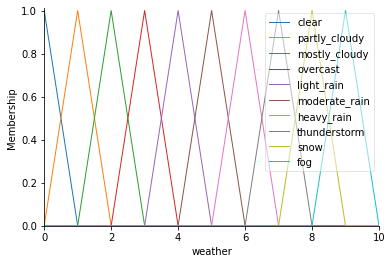

In [82]:
# trimf Membership functions for weather prediction
weather['clear'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['partly_cloudy'] = fuzz.trimf(weather.universe, [0, 1, 2])
weather['mostly_cloudy'] = fuzz.trimf(weather.universe, [1, 2, 3])
weather['overcast'] = fuzz.trimf(weather.universe, [2, 3, 4])
weather['light_rain'] = fuzz.trimf(weather.universe, [3, 4, 5])
weather['moderate_rain'] = fuzz.trimf(weather.universe, [4, 5, 6])
weather['heavy_rain'] = fuzz.trimf(weather.universe, [5, 6, 7])
weather['thunderstorm'] = fuzz.trimf(weather.universe, [6, 7, 8])
weather['snow'] = fuzz.trimf(weather.universe, [7, 8, 9])
weather['fog'] = fuzz.trimf(weather.universe, [8, 9, 10])

weather.view(figsize=(20, 20))

### 4- Rule Based

In [83]:
# 69 rule

rules =[
     ctrl.Rule(temperature_hist['medium'] & humidity_hist['medium'] & pressure_hist['normal'] & cloud_cover_hist['partly_cloudy'] &
              temperature_curr['medium'] & humidity_curr['medium'] & pressure_curr['normal'] & cloud_cover_curr['partly_cloudy'], weather['partly_cloudy']),
    ctrl.Rule(temperature_hist['hot'] & temperature_curr['hot'] & cloud_cover_hist['clear'] & cloud_cover_curr['clear'], weather['clear']),
    ctrl.Rule(humidity_hist['high'] & humidity_curr['high'] & cloud_cover_hist['overcast'] & cloud_cover_curr['overcast'], weather['fog']),
    ctrl.Rule(cloud_cover_hist['clear'] & cloud_cover_curr['clear'] & wind_speed_hist['calm'] & wind_speed_curr['calm'], weather['clear']),
    ctrl.Rule(temperature_hist['medium'] & temperature_curr['medium'] & cloud_cover_hist['clear'] & cloud_cover_curr['clear'], weather['clear']),
    ctrl.Rule(humidity_hist['medium'] & humidity_curr['medium'] & cloud_cover_hist['clear'] & cloud_cover_curr['clear'], weather['clear']),
    ctrl.Rule(pressure_hist['normal'] & pressure_curr['normal'] & cloud_cover_hist['clear'] & cloud_cover_curr['clear'], weather['clear']),
    ctrl.Rule(wind_speed_hist['calm'] & wind_speed_curr['calm'] & cloud_cover_hist['clear'] & cloud_cover_curr['clear'], weather['clear']),
    ctrl.Rule(precipitation_hist['none'] & precipitation_curr['none'] & cloud_cover_hist['clear'] & cloud_cover_curr['clear'], weather['clear']),
    ctrl.Rule(cloud_cover_hist['partly_cloudy'] & cloud_cover_curr['partly_cloudy'] & wind_speed_hist['calm'] & wind_speed_curr['calm'], weather['partly_cloudy']),
    ctrl.Rule(cloud_cover_hist['partly_cloudy'] & cloud_cover_curr['partly_cloudy'] & humidity_hist['medium'] & humidity_curr['medium'], weather['partly_cloudy']),
    ctrl.Rule(cloud_cover_hist['partly_cloudy'] & cloud_cover_curr['partly_cloudy'] & pressure_hist['normal'] & pressure_curr['normal'], weather['partly_cloudy']),
    ctrl.Rule(cloud_cover_hist['partly_cloudy'] & cloud_cover_curr['partly_cloudy'] & temperature_hist['medium'] & temperature_curr['medium'], weather['partly_cloudy']),
    ctrl.Rule(cloud_cover_hist['overcast'] & cloud_cover_curr['overcast'] & wind_speed_hist['calm'] & wind_speed_curr['calm'], weather['overcast']),
    ctrl.Rule(cloud_cover_hist['overcast'] & cloud_cover_curr['overcast'] & humidity_hist['medium'] & humidity_curr['medium'], weather['overcast']),
    ctrl.Rule(cloud_cover_hist['overcast'] & cloud_cover_curr['overcast'] & pressure_hist['normal'] & pressure_curr['normal'], weather['overcast']),
    ctrl.Rule(cloud_cover_hist['overcast'] & cloud_cover_curr['overcast'] & temperature_hist['medium'] & temperature_curr['medium'], weather['overcast']),
    ctrl.Rule(precipitation_hist['light'] | precipitation_curr['light'], weather['light_rain']),
    ctrl.Rule(precipitation_hist['moderate'] | precipitation_curr['moderate'], weather['moderate_rain']),
    ctrl.Rule(precipitation_hist['heavy'] | precipitation_curr['heavy'], weather['heavy_rain']),
    ctrl.Rule(temperature_hist['cold'] & temperature_curr['cold'], weather['snow']),
    ctrl.Rule(temperature_hist['cold'] & temperature_curr['cold'] & cloud_cover_hist['overcast'] & cloud_cover_curr['overcast'], weather['snow']),
    ctrl.Rule(temperature_hist['medium'] & temperature_curr['medium'] & precipitation_hist['light'] & precipitation_curr['light'], weather['light_rain']),
    ctrl.Rule(temperature_hist['medium'] & temperature_curr['medium'] & precipitation_hist['moderate'] & precipitation_curr['moderate'], weather['moderate_rain']),
    ctrl.Rule(temperature_hist['medium'] & temperature_curr['medium'] & precipitation_hist['heavy'] & precipitation_curr['heavy'], weather['heavy_rain']),
    ctrl.Rule(temperature_hist['hot'] & temperature_curr['hot'] & precipitation_hist['light'] & precipitation_curr['light'], weather['light_rain']),
    ctrl.Rule(temperature_hist['hot'] & temperature_curr['hot'] & precipitation_hist['moderate'] & precipitation_curr['moderate'], weather['moderate_rain']),
    ctrl.Rule(temperature_hist['hot'] & humidity_hist['high'] & temperature_curr['hot'] & humidity_curr['high'], weather['moderate_rain']),
    ctrl.Rule(temperature_hist['hot'] & temperature_curr['hot'] & precipitation_hist['heavy'] & precipitation_curr['heavy'], weather['heavy_rain']),
    ctrl.Rule(temperature_hist['cold'] & temperature_curr['cold'] & precipitation_hist['light'] & precipitation_curr['light'], weather['snow']),
    ctrl.Rule(temperature_hist['cold'] & temperature_curr['cold'] & precipitation_hist['moderate'] & precipitation_curr['moderate'], weather['snow']),
    ctrl.Rule(temperature_hist['cold'] & temperature_curr['cold'] & precipitation_hist['heavy'] & precipitation_curr['heavy'], weather['snow']),
    ctrl.Rule(humidity_hist['high'] & humidity_curr['high'] & precipitation_hist['light'] & precipitation_curr['light'], weather['fog']),
    ctrl.Rule(humidity_hist['high'] & humidity_curr['high'] & precipitation_hist['moderate'] & precipitation_curr['moderate'], weather['fog']),
    ctrl.Rule(humidity_hist['high'] & humidity_curr['high'] & precipitation_hist['heavy'] & precipitation_curr['heavy'], weather['fog']),
    ctrl.Rule(cloud_cover_hist['overcast'] & cloud_cover_curr['overcast'] & precipitation_hist['light'] & precipitation_curr['light'], weather['fog']),
    ctrl.Rule(cloud_cover_hist['overcast'] & cloud_cover_curr['overcast'] & precipitation_hist['moderate'] & precipitation_curr['moderate'], weather['fog']),
    ctrl.Rule(cloud_cover_hist['overcast'] & cloud_cover_curr['overcast'] & precipitation_hist['heavy'] & precipitation_curr['heavy'], weather['fog']),
    ctrl.Rule(pressure_hist['high'] & wind_speed_hist['windy'] & pressure_curr['high'] & wind_speed_curr['windy'], weather['thunderstorm']),
    ctrl.Rule(pressure_hist['high'] & wind_speed_hist['breezy'] & pressure_curr['high'] & wind_speed_curr['breezy'], weather['thunderstorm']),
    ctrl.Rule(cloud_cover_hist['partly_cloudy'] & cloud_cover_curr['partly_cloudy'] & wind_speed_hist['windy'] & wind_speed_curr['windy'], weather['thunderstorm']),
    ctrl.Rule(cloud_cover_hist['partly_cloudy'] & cloud_cover_curr['partly_cloudy'] & wind_speed_hist['breezy'] & wind_speed_curr['breezy'], weather['thunderstorm']),
    ctrl.Rule(cloud_cover_hist['overcast'] & cloud_cover_curr['overcast'] & wind_speed_hist['windy'] & wind_speed_curr['windy'], weather['thunderstorm']),
    ctrl.Rule(cloud_cover_hist['overcast'] & cloud_cover_curr['overcast'] & wind_speed_hist['breezy'] & wind_speed_curr['breezy'], weather['thunderstorm']),
    ctrl.Rule(temperature_hist['medium'] & temperature_curr['medium'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(humidity_hist['medium'] & humidity_curr['medium'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(pressure_hist['normal'] & pressure_curr['normal'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(wind_speed_hist['calm'] & wind_speed_curr['calm'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(precipitation_hist['none'] & precipitation_curr['none'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    
    ctrl.Rule(temperature_hist['medium'] & humidity_hist['medium'] & temperature_curr['cold'] & humidity_curr['high'], weather['moderate_rain']),
    ctrl.Rule(temperature_hist['cold'] & humidity_hist['high'] & temperature_curr['medium'] & humidity_curr['medium'], weather['light_rain']),
    ctrl.Rule(temperature_hist['cold'] & wind_speed_hist['windy'] & temperature_curr['medium'] & wind_speed_curr['calm'], weather['clear']),
    ctrl.Rule(temperature_hist['medium'] & wind_speed_hist['calm'] & cloud_cover_hist['clear'] & cloud_cover_curr['partly_cloudy'] & temperature_curr['cold'] & wind_speed_curr['windy'], weather['partly_cloudy']),

    ctrl.Rule(temperature_hist['medium'] & temperature_curr['hot'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(temperature_hist['hot'] & temperature_curr['medium'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(temperature_hist['cold'] & temperature_curr['medium'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(temperature_hist['medium'] & temperature_curr['cold'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),

    ctrl.Rule(humidity_hist['medium'] & humidity_curr['high'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(humidity_hist['high'] & humidity_curr['medium'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(humidity_hist['medium'] & humidity_curr['low'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(humidity_hist['low'] & humidity_curr['medium'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),

    ctrl.Rule(pressure_hist['normal'] & pressure_curr['high'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(pressure_hist['high'] & pressure_curr['normal'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(pressure_hist['normal'] & pressure_curr['low'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(pressure_hist['low'] & pressure_curr['normal'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),

    ctrl.Rule(wind_speed_hist['calm'] & wind_speed_curr['breezy'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(wind_speed_hist['breezy'] & wind_speed_curr['calm'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(wind_speed_hist['breezy'] & wind_speed_curr['windy'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),
    ctrl.Rule(wind_speed_hist['windy'] & wind_speed_curr['breezy'] & cloud_cover_hist['mostly_cloudy'] & cloud_cover_curr['mostly_cloudy'], weather['mostly_cloudy']),

]

### 5- Inference Engine

In [84]:
weather_ctrl = ctrl.ControlSystem(rules)
weather_sim = ctrl.ControlSystemSimulation(weather_ctrl)

### 6- Defuzzification

In [49]:
weather_sim.input['temperature_hist'] = 0
weather_sim.input['humidity_hist'] = 55
weather_sim.input['pressure_hist'] = 960
weather_sim.input['wind_speed_hist'] = 95
weather_sim.input['precipitation_hist'] = 400
weather_sim.input['cloud_cover_hist'] = 50

weather_sim.input['temperature_curr'] = 5
weather_sim.input['humidity_curr'] = 50
weather_sim.input['pressure_curr'] = 950
weather_sim.input['wind_speed_curr'] = 60
weather_sim.input['precipitation_curr'] = 500
weather_sim.input['cloud_cover_curr'] = 60

In [50]:
weather_sim.compute()

predicted_weather = weather_sim.output['weather']
print(f"Predicted Weather: {predicted_weather}")

Predicted Weather: 6.379746835443038


c:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


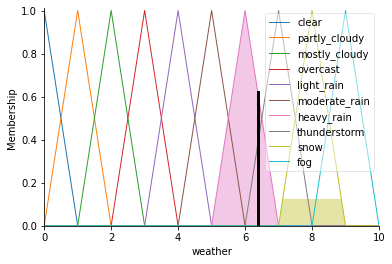

In [51]:
weather.view(sim=weather_sim)

### final predicted weather condition

In [16]:
weather_membership = {
    'clear': fuzz.interp_membership(weather.universe, weather['clear'].mf, predicted_weather),
    'partly_cloudy': fuzz.interp_membership(weather.universe, weather['partly_cloudy'].mf, predicted_weather),
    'mostly_cloudy': fuzz.interp_membership(weather.universe, weather['mostly_cloudy'].mf, predicted_weather),
    'overcast': fuzz.interp_membership(weather.universe, weather['overcast'].mf, predicted_weather),
    'light_rain': fuzz.interp_membership(weather.universe, weather['light_rain'].mf, predicted_weather),
    'moderate_rain': fuzz.interp_membership(weather.universe, weather['moderate_rain'].mf, predicted_weather),
    'heavy_rain': fuzz.interp_membership(weather.universe, weather['heavy_rain'].mf, predicted_weather),
    'thunderstorm': fuzz.interp_membership(weather.universe, weather['thunderstorm'].mf, predicted_weather),
    'snow': fuzz.interp_membership(weather.universe, weather['snow'].mf, predicted_weather),
    'fog': fuzz.interp_membership(weather.universe, weather['fog'].mf, predicted_weather)
}

max_membership_degree = 0
predicted_condition = None

for condition, membership_degree in weather_membership.items():
    membership_degree_value = membership_degree if isinstance(membership_degree, (int, float)) else membership_degree[0]
    if membership_degree_value > 0:
        print(f"Membership degree for {condition}: {membership_degree_value}")
        if membership_degree_value > max_membership_degree:
            max_membership_degree = membership_degree_value
            predicted_condition = condition

Membership degree for heavy_rain: 0.6202531645569618
Membership degree for thunderstorm: 0.3797468354430382


In [17]:
print(f"Final Predicted Weather Condition: {predicted_condition}")

Final Predicted Weather Condition: heavy_rain


### interface

In [186]:
def predicting_weather():
    temperature_hist = float(temperature_hist_input.get())
    humidity_hist = float(humidity_hist_input.get())                 
    pressure_hist = float(pressure_hist_input.get())
    wind_speed_hist = float(wind_speed_hist_input.get())
    precipitation_hist = float(precipitation_hist_input.get())                 
    cloud_cover_hist = float(cloud_cover_hist_input.get())  
    temperature_curr = float(temperature_curr_input.get())
    humidity_curr = float(humidity_curr_input.get())                 
    pressure_curr = float(pressure_curr_input.get())  
    wind_speed_curr = float(wind_speed_curr_input.get())
    precipitation_curr = float(precipitation_curr_input.get())                 
    cloud_cover_curr = float(cloud_cover_curr_input.get())  
    

    weather_sim.input['temperature_hist'] = temperature_hist
    weather_sim.input['humidity_hist'] = humidity_hist
    weather_sim.input['pressure_hist'] = pressure_hist
    weather_sim.input['wind_speed_hist'] = wind_speed_hist
    weather_sim.input['precipitation_hist'] = precipitation_hist
    weather_sim.input['cloud_cover_hist'] = cloud_cover_hist

    weather_sim.input['temperature_curr'] = temperature_curr
    weather_sim.input['humidity_curr'] = humidity_curr
    weather_sim.input['pressure_curr'] = pressure_curr
    weather_sim.input['wind_speed_curr'] = wind_speed_curr
    weather_sim.input['precipitation_curr'] = precipitation_curr
    weather_sim.input['cloud_cover_curr'] = cloud_cover_curr

    weather_sim.compute()
    predicted_weather = weather_sim.output['weather']

    weather_membership = {
    'clear': fuzz.interp_membership(weather.universe, weather['clear'].mf, predicted_weather),
    'partly_cloudy': fuzz.interp_membership(weather.universe, weather['partly_cloudy'].mf, predicted_weather),
    'mostly_cloudy': fuzz.interp_membership(weather.universe, weather['mostly_cloudy'].mf, predicted_weather),
    'overcast': fuzz.interp_membership(weather.universe, weather['overcast'].mf, predicted_weather),
    'light_rain': fuzz.interp_membership(weather.universe, weather['light_rain'].mf, predicted_weather),
    'moderate_rain': fuzz.interp_membership(weather.universe, weather['moderate_rain'].mf, predicted_weather),
    'heavy_rain': fuzz.interp_membership(weather.universe, weather['heavy_rain'].mf, predicted_weather),
    'thunderstorm': fuzz.interp_membership(weather.universe, weather['thunderstorm'].mf, predicted_weather),
    'snow': fuzz.interp_membership(weather.universe, weather['snow'].mf, predicted_weather),
    'fog': fuzz.interp_membership(weather.universe, weather['fog'].mf, predicted_weather)
     }

    max_membership_degree = 0
    predicted_condition = None

    for condition, membership_degree in weather_membership.items():
        membership_degree_value = membership_degree if isinstance(membership_degree, (int, float)) else membership_degree[0]
        if membership_degree_value > 0:
           if membership_degree_value > max_membership_degree:
              max_membership_degree = membership_degree_value
              predicted_condition = condition

    weather_result.config(text=f"Predicted Weather Condition is : {predicted_condition}")



In [187]:
root = tk.Tk()
root.title("Weather Prediction")
root.geometry("400x600")

ttk.Label(root, text="historical temperature:").grid(column=1, row=0)
temperature_hist_input = ttk.Entry(root)
temperature_hist_input.grid(column=2, row=0, padx=10, pady=10)

ttk.Label(root, text="historical humidity:").grid(column=1, row=1)
humidity_hist_input = ttk.Entry(root)
humidity_hist_input.grid(column=2, row=1, padx=10, pady=10)

ttk.Label(root, text="historical pressure:").grid(column=1, row=2)
pressure_hist_input = ttk.Entry(root)
pressure_hist_input.grid(column=2, row=2, padx=10, pady=10)

ttk.Label(root, text="historical wind speed:").grid(column=1, row=3)
wind_speed_hist_input = ttk.Entry(root)
wind_speed_hist_input.grid(column=2, row=3, padx=10, pady=10)

ttk.Label(root, text="historical precipitation:").grid(column=1, row=4)
precipitation_hist_input = ttk.Entry(root)
precipitation_hist_input.grid(column=2, row=4, padx=10, pady=10)

ttk.Label(root, text="historical cloud cover:").grid(column=1, row=5)
cloud_cover_hist_input = ttk.Entry(root)
cloud_cover_hist_input.grid(column=2, row=5, padx=10, pady=10)

ttk.Label(root, text="current temperature:").grid(column=1, row=6)
temperature_curr_input = ttk.Entry(root)
temperature_curr_input.grid(column=2, row=6, padx=10, pady=10)

ttk.Label(root, text="current humidity:").grid(column=1, row=7)
humidity_curr_input = ttk.Entry(root)
humidity_curr_input.grid(column=2, row=7, padx=10, pady=10)

ttk.Label(root, text="current pressure:").grid(column=1, row=8)
pressure_curr_input = ttk.Entry(root)
pressure_curr_input.grid(column=2, row=8, padx=10, pady=10)

ttk.Label(root, text="current wind speed:").grid(column=1, row=9)
wind_speed_curr_input = ttk.Entry(root)
wind_speed_curr_input.grid(column=2, row=9, padx=10, pady=10)

ttk.Label(root, text="current precipitation:").grid(column=1, row=10)
precipitation_curr_input = ttk.Entry(root)
precipitation_curr_input.grid(column=2, row=10, padx=10, pady=10)

ttk.Label(root, text="current cloud cover:").grid(column=1, row=11)
cloud_cover_curr_input = ttk.Entry(root)
cloud_cover_curr_input.grid(column=2, row=11, padx=10, pady=10)

prediction_button = ttk.Button(root, text="predict weather", command=predicting_weather)
prediction_button.grid(column=1, row=12, columnspan=2, pady=10)

weather_result = ttk.Label(root, text="Predicted Weather: ")
weather_result.grid(column=1, row=13, columnspan=2, pady=10)

root.mainloop()

### Testing

#### Test 1

In [14]:
weather_data = pd.read_csv('weather_prediction_dataset.csv')
weather_data2 = pd.read_csv('weatherHistory.csv')

In [19]:
weather_data2.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [20]:
weather_data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [21]:
weather_data.shape

(3654, 165)

In [22]:
oslo_data = weather_data.filter(like='OSLO')
oslo_data.head()

,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max
0,7,0.9,5.1,0.94,1.0130,0.04,0.60,0.0,-5.0,-8.6,-3.2
1,6,1.9,5.7,0.94,1.0076,0.11,0.00,1.6,-0.8,-6.7,2.4
2,6,1.7,8.7,0.88,1.0016,0.04,0.00,0.0,1.2,-1.1,3.8
3,1,3.4,11.8,0.58,0.9982,0.13,0.00,5.3,2.1,-0.5,5.1
4,8,1.2,5.7,0.94,1.0055,0.05,0.06,0.0,-0.7,-4.0,0.5


In [23]:
oslo_data.shape

(3654, 11)

In [24]:
oslo_data = pd.concat([weather_data[['DATE', 'MONTH']], weather_data[oslo_data.columns]], axis=1)
oslo_data.head()

,DATE,MONTH,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max
0,20000101,1,7,0.9,5.1,0.94,1.0130,0.04,0.60,0.0,-5.0,-8.6,-3.2
1,20000102,1,6,1.9,5.7,0.94,1.0076,0.11,0.00,1.6,-0.8,-6.7,2.4
2,20000103,1,6,1.7,8.7,0.88,1.0016,0.04,0.00,0.0,1.2,-1.1,3.8
3,20000104,1,1,3.4,11.8,0.58,0.9982,0.13,0.00,5.3,2.1,-0.5,5.1
4,20000105,1,8,1.2,5.7,0.94,1.0055,0.05,0.06,0.0,-0.7,-4.0,0.5


In [25]:
oslo_data.shape

(3654, 13)

In [125]:
#pressure Conversion factor
atm_to_hpa = 1013.25
oslo_data['OSLO_pressure'] = oslo_data['OSLO_pressure'] * atm_to_hpa

In [126]:
oslo_data.head()

,DATE,MONTH,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,temperature,OSLO_temp_min,OSLO_temp_max
0,20000101,1,7,0.9,5.1,0.94,1026.422250,0.04,0.60,0.0,-5.0,-8.6,-3.2
1,20000102,1,6,1.9,5.7,0.94,1020.950700,0.11,0.00,1.6,-0.8,-6.7,2.4
2,20000103,1,6,1.7,8.7,0.88,1014.871200,0.04,0.00,0.0,1.2,-1.1,3.8
3,20000104,1,1,3.4,11.8,0.58,1011.426150,0.13,0.00,5.3,2.1,-0.5,5.1
4,20000105,1,8,1.2,5.7,0.94,1018.822875,0.05,0.06,0.0,-0.7,-4.0,0.5


In [127]:
column_mapping = {
    'OSLO_temp_mean': 'temperature',
    'OSLO_humidity': 'humidity',
    'OSLO_pressure': 'pressure'
}

oslo_data.rename(columns=column_mapping, inplace=True)


In [128]:
column_mapping = {
    'Temperature (C)': 'temperature',
    'Humidity': 'humidity',
    'Pressure (millibars)' : 'pressure'
}

weather_data2.rename(columns=column_mapping, inplace=True)


In [142]:
oslo_data['temperature'] = oslo_data['temperature'].astype(float)
oslo_data['humidity'] = oslo_data['humidity'].astype(float)
oslo_data['pressure'] = oslo_data['pressure'].astype(float)

weather_data2['temperature'] = weather_data2['temperature'].astype(float)
weather_data2['humidity'] = weather_data2['humidity'].astype(float)
weather_data2['pressure'] = weather_data2['pressure'].astype(float)

In [143]:
oslo_data['temperature'] = oslo_data['temperature'].round(1)
oslo_data['humidity'] = oslo_data['humidity'].round(3)
# oslo_data['pressure'] = oslo_data['pressure'].round(4)

weather_data2['temperature'] = weather_data2['temperature'].round(1)
weather_data2['humidity'] = weather_data2['humidity'].round(3)
# weather_data2['pressure'] = weather_data2['pressure'].round(4)

In [144]:
weather_data2.shape

(96453, 12)

In [152]:
weather_data2_reduced = weather_data2[['temperature', 'humidity', 'Summary']]

merged_data = pd.merge(oslo_data, weather_data2_reduced, on=['temperature','humidity'], how='left')

merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]


In [141]:
merged_data.head()

,DATE,MONTH,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,humidity,pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,temperature,OSLO_temp_min,OSLO_temp_max,Summary
0,20000101,1,7,0.9,5.1,0.94,1026.422250,0.04,0.60,0.0,-5.0,-8.6,-3.2,NaN
1,20000102,1,6,1.9,5.7,0.94,1020.950700,0.11,0.00,1.6,-0.8,-6.7,2.4,NaN
2,20000103,1,6,1.7,8.7,0.88,1014.871200,0.04,0.00,0.0,1.2,-1.1,3.8,NaN
3,20000104,1,1,3.4,11.8,0.58,1011.426150,0.13,0.00,5.3,2.1,-0.5,5.1,NaN
4,20000105,1,8,1.2,5.7,0.94,1018.822875,0.05,0.06,0.0,-0.7,-4.0,0.5,NaN


In [153]:
merged_data.shape

(21712, 14)

In [139]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654 entries, 0 to 3653
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   3654 non-null   int64  
 1   MONTH                  3654 non-null   int64  
 2   OSLO_cloud_cover       3654 non-null   int64  
 3   OSLO_wind_speed        3654 non-null   float64
 4   OSLO_wind_gust         3654 non-null   float64
 5   humidity               3654 non-null   float64
 6   pressure               3654 non-null   float64
 7   OSLO_global_radiation  3654 non-null   float64
 8   OSLO_precipitation     3654 non-null   float64
 9   OSLO_sunshine          3654 non-null   float64
 10  temperature            3654 non-null   float64
 11  OSLO_temp_min          3654 non-null   float64
 12  OSLO_temp_max          3654 non-null   float64
 13  Summary                0 non-null      object 
dtypes: float64(10), int64(3), object(1)
memory usage: 428.2+

In [154]:
merged_data.isna().sum()

DATE                       0
MONTH                      0
OSLO_cloud_cover           0
OSLO_wind_speed            0
OSLO_wind_gust             0
humidity                   0
pressure                   0
OSLO_global_radiation      0
OSLO_precipitation         0
OSLO_sunshine              0
temperature                0
OSLO_temp_min              0
OSLO_temp_max              0
Summary                  813
dtype: int64

In [156]:
merged_data['Summary'].isna().sum()

0

In [155]:
merged_data = merged_data.dropna()

In [150]:
merged_data['Summary'].isna().sum()

0

In [157]:
merged_data['Summary'].value_counts()

Mostly Cloudy               6788
Partly Cloudy               5626
Overcast                    4552
Clear                       2258
Foggy                       1214
Breezy and Overcast          174
Breezy and Mostly Cloudy     119
Breezy and Partly Cloudy      83
Light Rain                    15
Breezy                        15
Windy and Overcast            13
Windy and Partly Cloudy       13
Drizzle                       12
Windy and Mostly Cloudy        8
Breezy and Foggy               6
Windy                          2
Rain                           1
Name: Summary, dtype: int64

In [158]:
Summary_map = {
    'Mostly Cloudy': 'Mostly Cloudy',
    'Partly Cloudy': 'Partly Cloudy',
    'Overcast': 'Overcast',
    'Clear': 'Clear',
    'Foggy': 'Foggy',
    'Breezy and Overcast': 'Overcast',
    'Breezy and Mostly Cloudy': 'Mostly Cloudy',
    'Breezy and Partly Cloudy': 'Partly Cloudy',
    'Light Rain': 'Light Rain',
    'Windy and Overcast': 'Overcast',
    'Windy and Partly Cloudy': 'Partly Cloudy',
    'Windy and Mostly Cloudy': 'Mostly Cloudy',
    'Breezy and Foggy': 'Foggy'
}

merged_data['Summary'] = merged_data['Summary'].map(Summary_map)

print(merged_data['Summary'].value_counts())


Mostly Cloudy    6915
Partly Cloudy    5722
Overcast         4739
Clear            2258
Foggy            1220
Light Rain         15
Name: Summary, dtype: int64


In [159]:
merged_data.shape

(20899, 14)

In [160]:
historical_data = merged_data.iloc[::2]  # even rows
current_data = merged_data.iloc[1::2]  # odd rows

In [161]:
current_data.shape

(10449, 14)

In [106]:
historical_data.shape

(10450, 14)

In [162]:
X = current_data.drop(columns=['Summary'])
y = current_data['Summary'] 

In [164]:
predicted_weather_conditions = []
for i in range(10449):

  weather_sim.input['temperature_hist'] = historical_data['temperature'].iloc[i]  
  weather_sim.input['humidity_hist'] = historical_data['humidity'].iloc[i]  
  weather_sim.input['pressure_hist'] = historical_data['pressure'].iloc[i]  
  weather_sim.input['wind_speed_hist'] = historical_data['OSLO_wind_speed'].iloc[i]  
  weather_sim.input['precipitation_hist'] = historical_data['OSLO_precipitation'].iloc[i]  
  weather_sim.input['cloud_cover_hist'] =historical_data['OSLO_cloud_cover'].iloc[i]

  weather_sim.input['temperature_curr'] = current_data['temperature'].iloc[i]  
  weather_sim.input['humidity_curr'] = current_data['humidity'].iloc[i]  
  weather_sim.input['pressure_curr'] = current_data['pressure'].iloc[i] 
  weather_sim.input['wind_speed_curr'] = current_data['OSLO_wind_speed'].iloc[i] 
  weather_sim.input['precipitation_curr'] = current_data['OSLO_precipitation'].iloc[i] 
  weather_sim.input['cloud_cover_curr'] =current_data['OSLO_cloud_cover'].iloc[i]

  weather_sim.compute()
  predicted_weather = weather_sim.output['weather']

  predicted_weather_conditions.append(predicted_weather)

In [180]:
predicted_weather_final = []

for i in range(10449):
    weather_membership = {
        'Clear': fuzz.interp_membership(weather.universe, weather['clear'].mf, predicted_weather_conditions[i]),
        'Partly Cloudy': fuzz.interp_membership(weather.universe, weather['partly_cloudy'].mf, predicted_weather_conditions[i]),
        'Mostly Cloudy': fuzz.interp_membership(weather.universe, weather['mostly_cloudy'].mf, predicted_weather_conditions[i]),
        'Overcast': fuzz.interp_membership(weather.universe, weather['overcast'].mf, predicted_weather_conditions[i]),
        # 'Light Rain': fuzz.interp_membership(weather.universe, weather['light_rain'].mf, predicted_weather_conditions[i]),
        # 'Moderate Rain': fuzz.interp_membership(weather.universe, weather['moderate_rain'].mf, predicted_weather_conditions[i]),
        # 'Heavy Rain': fuzz.interp_membership(weather.universe, weather['heavy_rain'].mf, predicted_weather_conditions[i]),
        # 'Thunderstorm': fuzz.interp_membership(weather.universe, weather['thunderstorm'].mf, predicted_weather_conditions[i]),
        # 'Snow': fuzz.interp_membership(weather.universe, weather['snow'].mf, predicted_weather_conditions[i]),
        'Foggy': fuzz.interp_membership(weather.universe, weather['fog'].mf, predicted_weather_conditions[i])
    }

    max_membership_degree = 0
    predicted_condition = None

    for condition, membership_degree in weather_membership.items():
        membership_degree_value = membership_degree if isinstance(membership_degree, (int, float)) else membership_degree[0]
        if membership_degree_value > 0:
            if membership_degree_value > max_membership_degree:
                max_membership_degree = membership_degree_value
                predicted_condition = condition

    predicted_weather_final.append(predicted_condition)

print(predicted_weather_final)


[None, 'Overcast', 'Overcast', 'Overcast', None, None, 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', None, None, None, None, None, 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'Overcast', 'Overcast', None, 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast', 'Overcast

In [ ]:
y.shape

In [181]:
valid_indices = [i for i, condition in enumerate(predicted_weather_final) if condition is not None]

y_filtered = [y[i] for i in valid_indices]

predicted_weather_final_filtered = [predicted_weather_final[i] for i in valid_indices]

In [183]:
print("Length of predicted_weather_final:", len(predicted_weather_final_filtered))

Length of predicted_weather_final: 8801


In [178]:
predicted_weather_final = [str(cond) for cond in predicted_weather_final]
y = [str(cond) for cond in y]

In [185]:
accuracy = accuracy_score(y_filtered, predicted_weather_final_filtered)
print("Accuracy:", accuracy)

Accuracy: 0.22917850244290422


#### test 2

In [14]:
weather_data3 = pd.read_csv('GlobalWeatherRepository.csv')

In [15]:
weather_data3.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [16]:
weather_data3.shape

(7193, 41)

In [17]:
weather_data3.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [18]:
weather_data3['country'].value_counts()

Bulgaria      109
Indonesia      74
Sudan          74
Bolivia        74
Belgium        74
             ... 
Greece         36
Grenada        36
Maldives       35
San Marino     35
Cameroon       35
Name: country, Length: 185, dtype: int64

In [22]:
weather_data3_reduced = weather_data3[['country','location_name','last_updated','condition_text', 'temperature_celsius', 'wind_kph' , 'pressure_mb' , 'precip_mm' , 'humidity' , 'cloud']]

In [23]:
bulgaria_data = weather_data3_reduced[weather_data3_reduced['country'] == 'Bulgaria']

bulgaria_data.head()

,country,location_name,last_updated,condition_text,temperature_celsius,wind_kph,pressure_mb,precip_mm,humidity,cloud
25,Bulgaria,Sofia,2024-05-16 11:45,Overcast,12.0,20.2,1021.0,0.00,77,100
37,Bulgaria,Bogot,2024-05-16 11:45,Overcast,15.9,14.0,1020.0,0.00,62,100
175,Bulgaria,Lom,2024-05-16 11:45,Sunny,19.0,29.9,1021.0,0.00,43,0
220,Bulgaria,Sofia,2024-05-16 17:00,Light rain,11.0,31.0,1020.0,0.15,82,75
232,Bulgaria,Bogot,2024-05-16 17:00,Partly Cloudy,19.4,19.8,1017.0,0.00,61,52


In [24]:
bulgaria_data.shape

(109, 10)

In [25]:
bulgaria_data['location_name'].value_counts()

Bogot    37
Sofia    36
Lom      36
Name: location_name, dtype: int64

In [55]:
Bogot_data = bulgaria_data[bulgaria_data['location_name'] == 'Bogot']

Bogot_data.head()

,country,location_name,last_updated,condition_text,temperature_celsius,wind_kph,pressure_mb,precip_mm,humidity,cloud
37,Bulgaria,Bogot,2024-05-16 11:45,Overcast,15.9,14.0,1020.0,0.0,62,100
232,Bulgaria,Bogot,2024-05-16 17:00,Partly Cloudy,19.4,19.8,1017.0,0.0,61,52
427,Bulgaria,Bogot,2024-05-17 19:00,Cloudy,16.7,15.5,1016.0,0.0,76,65
619,Bulgaria,Bogot,2024-05-18 17:30,Sunny,22.6,6.8,1015.0,0.0,61,25
813,Bulgaria,Bogot,2024-05-19 17:00,Partly Cloudy,16.6,9.0,1015.0,0.0,91,62


In [56]:
Bogot_data.shape

(37, 10)

In [40]:
Bogot_data.isna().sum()

country                0
location_name          0
last_updated           0
condition_text         0
temperature_celsius    0
wind_kph               0
pressure_mb            0
precip_mm              0
humidity               0
cloud                  0
dtype: int64

In [41]:
Bogot_data['condition_text'].value_counts()

Sunny                                     16
Patchy rain nearby                         8
Partly Cloudy                              5
Thundery outbreaks in nearby               3
Overcast                                   1
Cloudy                                     1
Patchy light drizzle                       1
Patchy light rain in area with thunder     1
Heavy rain at times                        1
Name: condition_text, dtype: int64

In [57]:
Summary_map = {
    'Cloudy': 'Mostly Cloudy',
    'Partly Cloudy': 'Partly Cloudy',
    'Overcast': 'Overcast',
    'Sunny': 'Clear',
    'Thundery outbreaks in nearby': 'Thunderstorm',
    'Heavy rain at times': 'Heavy Rain',
    'Patchy light rain in area with thunder': 'Light Rain',
    'Patchy light drizzle':'Light Rain',
    'Patchy rain nearby':'Light Rain',
}

Bogot_data['condition_text'] = Bogot_data['condition_text'].map(Summary_map)

print(Bogot_data['condition_text'].value_counts())


Clear            16
Light Rain       10
Partly Cloudy     5
Thunderstorm      3
Overcast          1
Mostly Cloudy     1
Heavy Rain        1
Name: condition_text, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_19776\31489303.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bogot_data['condition_text'] = Bogot_data['condition_text'].map(Summary_map)


In [71]:
historical_data = Bogot_data.iloc[::2]  # even rows
current_data = Bogot_data.iloc[1::2]  # odd rows

In [72]:
historical_data.shape

(19, 10)

In [73]:
current_data.shape

(18, 10)

In [61]:
X = current_data.drop(columns=['condition_text'])
y = current_data['condition_text'] 

In [91]:
predicted_weather_conditions = []
for i in range(18):

  weather_sim.input['temperature_hist'] = historical_data['temperature_celsius'].iloc[i]  
  weather_sim.input['humidity_hist'] = historical_data['humidity'].iloc[i]  
  weather_sim.input['pressure_hist'] = historical_data['pressure_mb'].iloc[i]  
  weather_sim.input['wind_speed_hist'] = historical_data['wind_kph'].iloc[i]  
  weather_sim.input['precipitation_hist'] = historical_data['precip_mm'].iloc[i]  
  weather_sim.input['cloud_cover_hist'] =historical_data['cloud'].iloc[i]

  weather_sim.input['temperature_curr'] = current_data['temperature_celsius'].iloc[i]  
  weather_sim.input['humidity_curr'] = current_data['humidity'].iloc[i]  
  weather_sim.input['pressure_curr'] = current_data['pressure_mb'].iloc[i] 
  weather_sim.input['wind_speed_curr'] = current_data['wind_kph'].iloc[i] 
  weather_sim.input['precipitation_curr'] = current_data['precip_mm'].iloc[i] 
  weather_sim.input['cloud_cover_curr'] =current_data['cloud'].iloc[i]

  weather_sim.compute()
  predicted_weather = weather_sim.output['weather']

  predicted_weather_conditions.append(predicted_weather)

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.